In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    Latitudes (lat1, lat2) and longitudes (long1, long2) are stored in degrees in the DataFrame.
    """
    r = 6371  # average radius of Earth in kilometers. It will be used to convert the angular distance into physical distance (kilometers)

    # Convert angles from degrees to radians.
    # because trigonometric functions in Python work with angles measured in radians.
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    # The function calculates the difference between the latitudes (delta_phi) and the longitudes (delta_lambda), 
    # also converting these differences into radians.
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    # a is a temporary value calculated using the sine and cosine of the latitudes and longitudes.
    # c is the angular distance between the two points, calculated using the arctangent function (np.arctan2).
    # The actual distance d is computed by multiplying the angular distance c by the Earth's radius r, yielding the distance in kilometers.
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

### Feature engineering

In [6]:
df['dist_km'] = haversine_distance(df, 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude')

In [7]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [11]:
# Eastern Daylight Time (EDT) is UTC minus 4 hours (UTC-4)
# converts the pickup_datetime column in the DataFrame to Eastern Daylight Time (EDT) by subtracting 4 hours.
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764,2010-04-16 22:19:01+00:00


In [13]:
df['Hour'] = df['EDTdate'].dt.hour

In [15]:
df['MORorAFTorNIG'] = df['Hour'].apply(lambda x: 'mor' if x<12 else 'aft' if x< 18 else 'nig')

In [14]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,Weekday,MORorAFTorNIG
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522,2010-04-19 04:17:56+00:00,4,Mon,mor
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370,2010-04-17 11:43:53+00:00,11,Sat,mor
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373,2010-04-17 07:23:26+00:00,7,Sat,mor
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661,2010-04-11 17:25:03+00:00,17,Sun,aft
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764,2010-04-16 22:19:01+00:00,22,Fri,nig


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   EDTdate            120000 non-null  datetime64[ns, UTC]
 10  Hour               120000 non-null  int32              
 11  Weekday            120000 non-null  object             
 12  MORorAFTorNIG      120000 non-

In [18]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'Weekday',
       'MORorAFTorNIG'],
      dtype='object')

In [19]:
cat_cols = ['Hour', 'MORorAFTorNIG', 'Weekday']
num_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']

In [20]:
y_col = ['fare_amount']

In [21]:
# .astype('category'): This converts the data type of the column to the Pandas category type. 
# The category data type is used to efficiently represent categorical variables, especially when they have a limited number of distinct values.

for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [22]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
Weekday                         category
MORorAFTorNIG                   category
dtype: object

In [23]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [24]:
df['MORorAFTorNIG'].head()

0    mor
1    mor
2    mor
3    aft
4    nig
Name: MORorAFTorNIG, dtype: category
Categories (3, object): ['aft', 'mor', 'nig']

In [25]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [26]:
# The .cat.codes attribute provides the integer representation of each category, 
# which can be useful for machine learning models or other numerical processing.

df['MORorAFTorNIG'].cat.codes.values

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [27]:
hr = df['Hour'].cat.codes.values
moraftnig = df['MORorAFTorNIG'].cat.codes.values
weekday = df['Weekday'].cat.codes.values

In [28]:
cats = np.stack([hr, moraftnig, weekday], axis=1)

In [29]:
cats

array([[ 4,  1,  1],
       [11,  1,  2],
       [ 7,  1,  2],
       ...,
       [14,  0,  3],
       [ 4,  1,  5],
       [12,  0,  2]], dtype=int8)

### NOTE: This can be done in one line of code using a list comprehension:
cats = np.stack([df[col].cat.codes.values for col i ncal_coss], 1)

In [30]:
# convert np.array to tensors

cats = torch.tensor(cats, dtype=torch.int64)

In [31]:
nums = np.stack([df[col].values for col in num_cols], axis=1)

In [32]:
nums = torch.tensor(nums, dtype=torch.float)

In [33]:
nums

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   1.9255],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.7654],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.8184],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   2.8595],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.3207],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.3848]])

In [34]:
y = torch.tensor(df[y_col].values, dtype=torch.float)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [35]:
nums.shape

torch.Size([120000, 6])

In [36]:
cats.shape

torch.Size([120000, 3])

In [37]:
y.shape

torch.Size([120000, 1])

In [38]:
# setting up embedding size for the categorical columns
# how many unique values for each col

cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [39]:
cat_szs

[24, 3, 7]

In [40]:
# embedding sizes calculation
# The embedding size is often set to be smaller than the number of unique categories to reduce the dimensionality and improve learning efficiency.

emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [41]:
emb_szs

[(24, 12), (3, 2), (7, 4)]

In [42]:
catz = cats[:2]
catz

tensor([[ 4,  1,  1],
        [11,  1,  2]])

In [43]:
# It is used to create a list of embedding layers for categorical variables
# nn.ModuleList is a container in PyTorch that holds a list of layers (or modules). In this case, it's being used to store a list of embedding layers.
# nn.ModuleList ensures that PyTorch can properly track all the layers and parameters within the model.
# nn.Embedding is a PyTorch layer used to learn embeddings for categorical variables. 
# It maps each unique category (represented as an integer index) to a vector of real numbers.
# ni: This is the number of unique categories for a specific categorical variable (i.e., the input dimension of the embedding).
# nf: This is the size of the embedding (i.e., the output dimension of the embedding), or the number of dimensions in the learned embedding vector.

selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [44]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(3, 2)
  (2): Embedding(7, 4)
)

In [45]:
# Forward method (cats)
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [46]:
embeddingz

[tensor([[ 0.1186, -0.0566, -0.3417,  0.8345,  0.1141, -1.4067, -0.6505,  0.7532,
          -1.0184,  0.4293,  0.1610, -0.0852],
         [-0.9093,  0.6782,  0.2166,  0.6320,  0.5413, -0.1677,  0.5417, -0.2569,
          -0.1524,  1.3189,  0.7443, -0.7295]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.2256,  0.5894],
         [-1.2256,  0.5894]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3453,  1.7912,  1.2432,  1.2245],
         [-0.3197,  0.4979,  1.6535, -1.2242]], grad_fn=<EmbeddingBackward0>)]

In [47]:
z = torch.cat(embeddingz,1)

In [48]:
z

tensor([[ 0.1186, -0.0566, -0.3417,  0.8345,  0.1141, -1.4067, -0.6505,  0.7532,
         -1.0184,  0.4293,  0.1610, -0.0852, -1.2256,  0.5894, -0.3453,  1.7912,
          1.2432,  1.2245],
        [-0.9093,  0.6782,  0.2166,  0.6320,  0.5413, -0.1677,  0.5417, -0.2569,
         -0.1524,  1.3189,  0.7443, -0.7295, -1.2256,  0.5894, -0.3197,  0.4979,
          1.6535, -1.2242]], grad_fn=<CatBackward0>)

In [49]:
selfembdrop = nn.Dropout(0.4)

In [50]:
z = selfembdrop(z)

In [51]:
z

tensor([[ 0.1976, -0.0944, -0.0000,  0.0000,  0.1901, -2.3445, -0.0000,  1.2553,
         -1.6974,  0.7156,  0.0000, -0.0000, -0.0000,  0.9823, -0.5754,  0.0000,
          2.0720,  2.0408],
        [-1.5154,  0.0000,  0.0000,  1.0533,  0.9022, -0.2795,  0.0000, -0.4281,
         -0.0000,  2.1981,  1.2405, -1.2158, -2.0426,  0.0000, -0.0000,  0.0000,
          2.7559, -0.0000]], grad_fn=<MulBackward0>)

In [52]:
class TabularModel(nn.Module):
    """
    It is a neural network model implemented in PyTorch.
    The TubularModel is designed to handle both categorical and numerical inputs 
    by embedding the categorical variables and applying batch normalization to the numerical features.
    
    """

    def __init__(self, emb_szs, n_num, out_sz, layers, p=0.5):
        """
        emb_szs: a list of tuples where each tuple represents the size and embedding dimension for categorical variables.
        The first element of each tuple is the number of unique categories, and the second is the embedding size.
        n_num: the number of numercial features.
        out_sz: the output size (number of classes in classification or 1 for regression).
        layers: a list defining the sizes of the hidden layers.
        p: Dropout probability, used to regularize the model and prevent overfitting.
        """
        # layers = [200, 100, 50]
        super().__init__()

        # a list of embedding layers for the categorical features.
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        # Dropout applied to the embeddings to prevent overfitting.
        self.emb_drop = nn.Dropout(p)
        # batch normalization for the numercial features so that they have a mean of 0 and a sd of 1.
        self.bn_num = nn.BatchNorm1d(n_num)

        # Sequential layer construction
        layerlist = []
        # n_emb is the all embedding dimensions
        n_emb = sum([nf for ni, nf in emb_szs])
        # The total input size is the sum of n_emb plus the number of numercial features (n_num)
        n_in = n_emb + n_num

        for i in layers:
            # each layer consists of a Linear layer (fully connected layer), a ReLU activaton function, Batch normalization, Dropout for regularization.
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))

        # a sequential stack of fully connected layers that form the main part of the neural network.
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_num):
        """
        The forward pass combines the processed categorical and numerical inputs, 
        passes them through a series of fully connected layers, and returns the final output.
        x_cat: a tensor of categorical inputs, where each column represents one categorical variable.
        x_num: a tensor of numberical inputs.
        """
        embeddings = []

        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1) # The embedding vectors are concatenated along the second dimension to form a single tensor x.
        x = self.emb_drop(x) # Dropout is applied to the concatenated embedding tensor.

        x_num = self.bn_num(x_num) # The numerical inputs are batch normalized.
        x = torch.cat([x, x_num], 1) #The embeddings and the numerical inputs are concatenated to form the complete input to the fully connected layers.
        x = self.layers(x) # the concatenated input is passed through the fully connected layers.
        return x  

In [53]:
torch.manual_seed(33)
model = TabularModel(emb_szs, nums.shape[1], 1, [200, 100], p=0.4)

In [54]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(3, 2)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=24, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [55]:
criterion = nn.MSELoss()  # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
batch_size = 30000
test_size = int(batch_size*0.2)

In [57]:
# Data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
num_train = nums[:batch_size-test_size]
num_test = nums[batch_size-test_size:batch_size]

In [58]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [59]:
len(cat_train)

24000

In [60]:
len(num_train)

24000

In [61]:
len(cat_test)

6000

In [62]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1

    y_pred = model(cat_train, num_train)
    loss = torch.sqrt(criterion(y_pred, y_train))  # RMSE
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.441638946533203
epoch: 11 loss is 11.5402250289917
epoch: 21 loss is 11.024868965148926
epoch: 31 loss is 10.706114768981934
epoch: 41 loss is 10.45806884765625
epoch: 51 loss is 10.24555778503418
epoch: 61 loss is 10.060094833374023
epoch: 71 loss is 9.862958908081055
epoch: 81 loss is 9.644067764282227
epoch: 91 loss is 9.395541191101074
epoch: 101 loss is 9.123790740966797
epoch: 111 loss is 8.829329490661621
epoch: 121 loss is 8.495613098144531
epoch: 131 loss is 8.138218879699707
epoch: 141 loss is 7.7160162925720215
epoch: 151 loss is 7.275424480438232
epoch: 161 loss is 6.80300235748291
epoch: 171 loss is 6.31599760055542
epoch: 181 loss is 5.81533670425415
epoch: 191 loss is 5.355668544769287
epoch: 201 loss is 4.923342704772949
epoch: 211 loss is 4.559576511383057
epoch: 221 loss is 4.238735675811768
epoch: 231 loss is 4.070035457611084
epoch: 241 loss is 3.932581901550293
epoch: 251 loss is 3.8236348628997803
epoch: 261 loss is 3.8286800384521484
epoch: 27

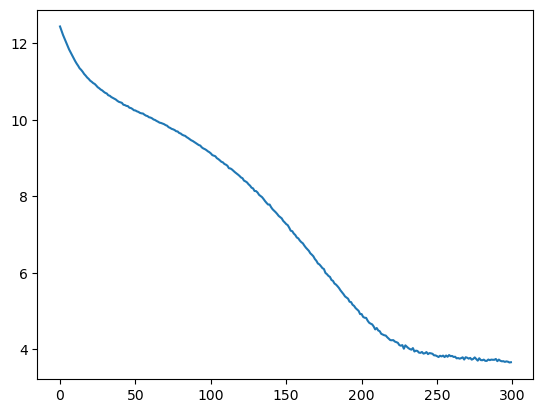

In [63]:
# Convert list of tensors to a list of NumPy arrays
losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses]
plt.plot(range(epochs), losses)

In [64]:
with torch.no_grad():

    y_val = model(cat_test, num_test)

    loss = torch.sqrt(criterion(y_val, y_test))

In [65]:
loss

tensor(3.6180)

In [66]:
for i in range(10):

    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) Predicted: {y_val[i].item():8.2f} True: {y_test[i].item():8.2f} Diff: {diff:8.2f}')

0.) Predicted:     5.03 True:     4.90 Diff:     0.13
1.) Predicted:    10.91 True:     8.50 Diff:     2.41
2.) Predicted:     6.30 True:     4.90 Diff:     1.40
3.) Predicted:    18.59 True:    14.90 Diff:     3.69
4.) Predicted:    10.22 True:     9.70 Diff:     0.52
5.) Predicted:    32.64 True:    30.27 Diff:     2.37
6.) Predicted:     4.22 True:     5.30 Diff:     1.08
7.) Predicted:     3.82 True:     5.30 Diff:     1.48
8.) Predicted:     2.75 True:     6.10 Diff:     3.35
9.) Predicted:     4.08 True:     6.10 Diff:     2.02


In [67]:
torch.save(model.state_dict(), 'Taximodel_version3.pt')